In [ ]:
#Load all libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import time


# Set display options for pandas
display_options = {
    'display.max_columns': None,
    'display.width': 1000,
}
for option, value in display_options.items():
    pd.set_option(option, value)

# Set seaborn style for visualization
sns.set_style("darkgrid")

# Check TensorFlow and Keras versions
# Check TensorFlow and Keras versions
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.version.VERSION)


TensorFlow version: 2.18.0
Keras version: 2.18.0


In [ ]:
# Load dataset
# Step 2: Load the phishing website dataset
dataset_path = "/content/dataset_full.csv"
data = pd.read_csv(dataset_path)

# Display basic information about the dataset
print("Dataset loaded successfully!")
print("Dataset shape:", data.shape)
print("First five rows:")
print(data.head())

Dataset loaded successfully!
Dataset shape: (70454, 112)
First five rows:
   qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  qty_exclamation_url  qty_space_url  qty_tilde_url  qty_comma_url  qty_plus_url  qty_asterisk_url  qty_hashtag_url  qty_dollar_url  qty_percent_url  qty_tld_url  length_url  qty_dot_domain  qty_hyphen_domain  qty_underline_domain  qty_slash_domain  qty_questionmark_domain  qty_equal_domain  qty_at_domain  qty_and_domain  qty_exclamation_domain  qty_space_domain  qty_tilde_domain  qty_comma_domain  qty_plus_domain  qty_asterisk_domain  qty_hashtag_domain  qty_dollar_domain  qty_percent_domain  qty_vowels_domain  domain_length  domain_in_ip  server_client_domain  qty_dot_directory  qty_hyphen_directory  qty_underline_directory  qty_slash_directory  qty_questionmark_directory  qty_equal_directory  qty_at_directory  qty_and_directory  qty_exclamation_directory  qty_space_directory  qty_tilde_

In [ ]:
# Step 3: Preprocess the dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Handle missing values
data = data.dropna()

# Remove duplicate rows
data = data.drop_duplicates()

# Convert boolean features to integer
boolean_columns = ['email_in_url', 'domain_in_ip', 'server_client_domain', 'tld_present_params', 'domain_spf', 'tls_ssl_certificate', 'url_google_index', 'domain_google_index', 'url_shortened', 'phishing']
data[boolean_columns] = data[boolean_columns].astype(int)

# Identify numerical columns
numerical_columns = [col for col in data.columns if col not in boolean_columns]

# Standardize numerical features using StandardScaler
scaler_standard = StandardScaler()
data[numerical_columns] = scaler_standard.fit_transform(data[numerical_columns])

# Normalize numerical features using MinMaxScaler
scaler_minmax = MinMaxScaler()
data[numerical_columns] = scaler_minmax.fit_transform(data[numerical_columns])

# Save the cleaned dataset as newphishdata.csv
cleaned_dataset_path = "newphishdata.csv"
data.to_csv(cleaned_dataset_path, index=False)

print("Dataset preprocessing completed. Cleaned dataset saved as", cleaned_dataset_path)



<ipython-input-3-40d0bd05b13f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[boolean_columns] = data[boolean_columns].astype(int)


Dataset preprocessing completed. Cleaned dataset saved as newphishdata.csv



Summary Statistics:
        qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  qty_exclamation_url  qty_space_url  qty_tilde_url  qty_comma_url  qty_plus_url  qty_asterisk_url  qty_hashtag_url  qty_dollar_url  qty_percent_url   qty_tld_url    length_url  qty_dot_domain  qty_hyphen_domain  qty_underline_domain  qty_slash_domain  qty_questionmark_domain  qty_equal_domain  qty_at_domain  qty_and_domain  qty_exclamation_domain  qty_space_domain  qty_tilde_domain  qty_comma_domain  qty_plus_domain  qty_asterisk_domain  qty_hashtag_domain  qty_dollar_domain  qty_percent_domain  qty_vowels_domain  domain_length  domain_in_ip  server_client_domain  qty_dot_directory  qty_hyphen_directory  qty_underline_directory  qty_slash_directory  qty_questionmark_directory  qty_equal_directory  qty_at_directory  qty_and_directory  qty_exclamation_directory  qty_space_directory  qty_tilde_directory  qty_comma_directory  qty_plus_d

<ipython-input-4-69696e36bbf0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='phishing', data=data, palette='coolwarm')


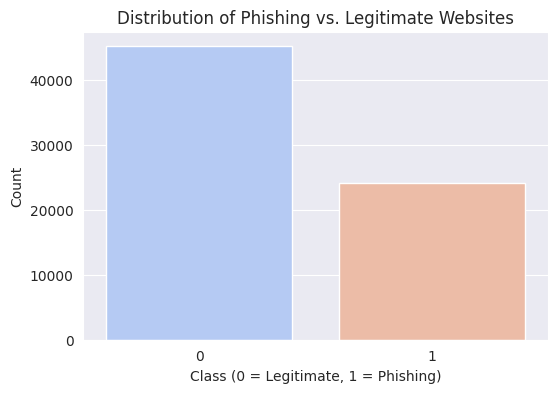

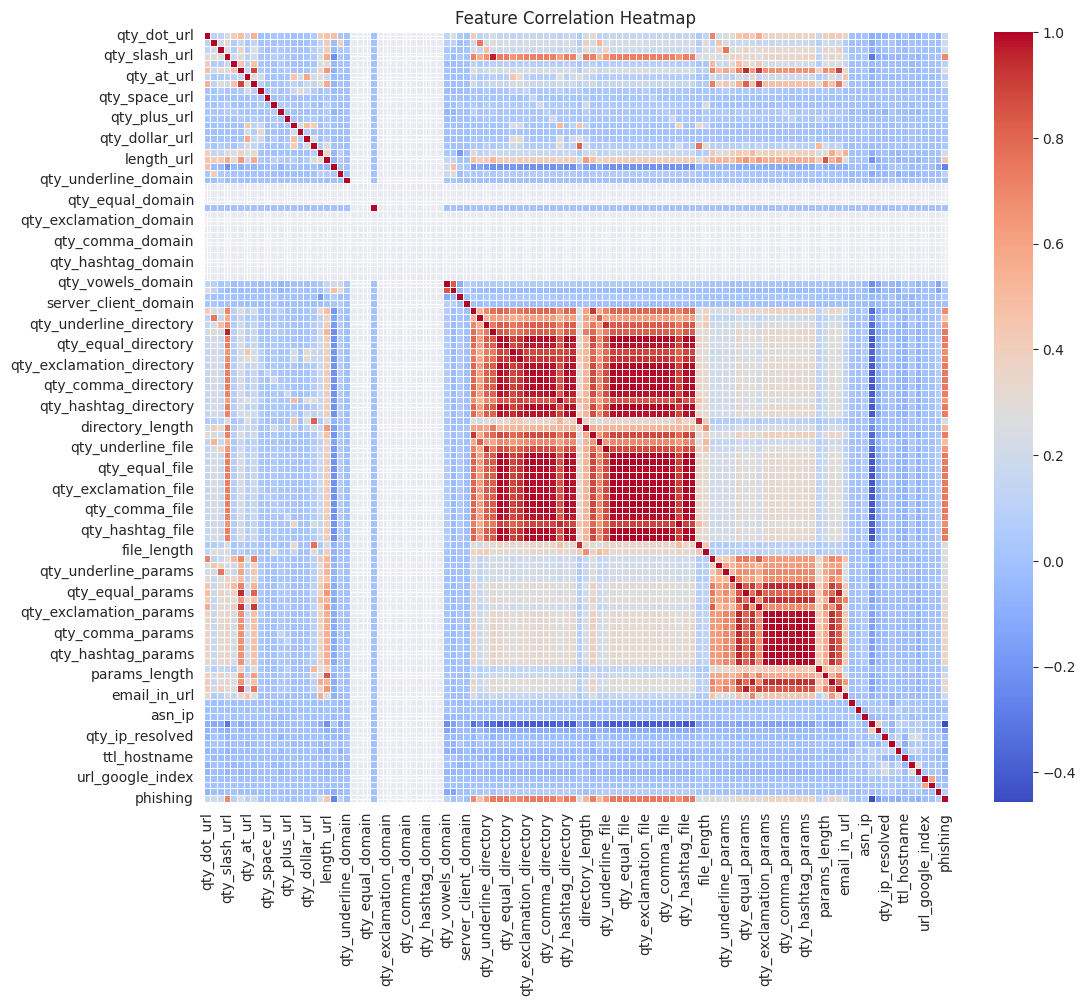

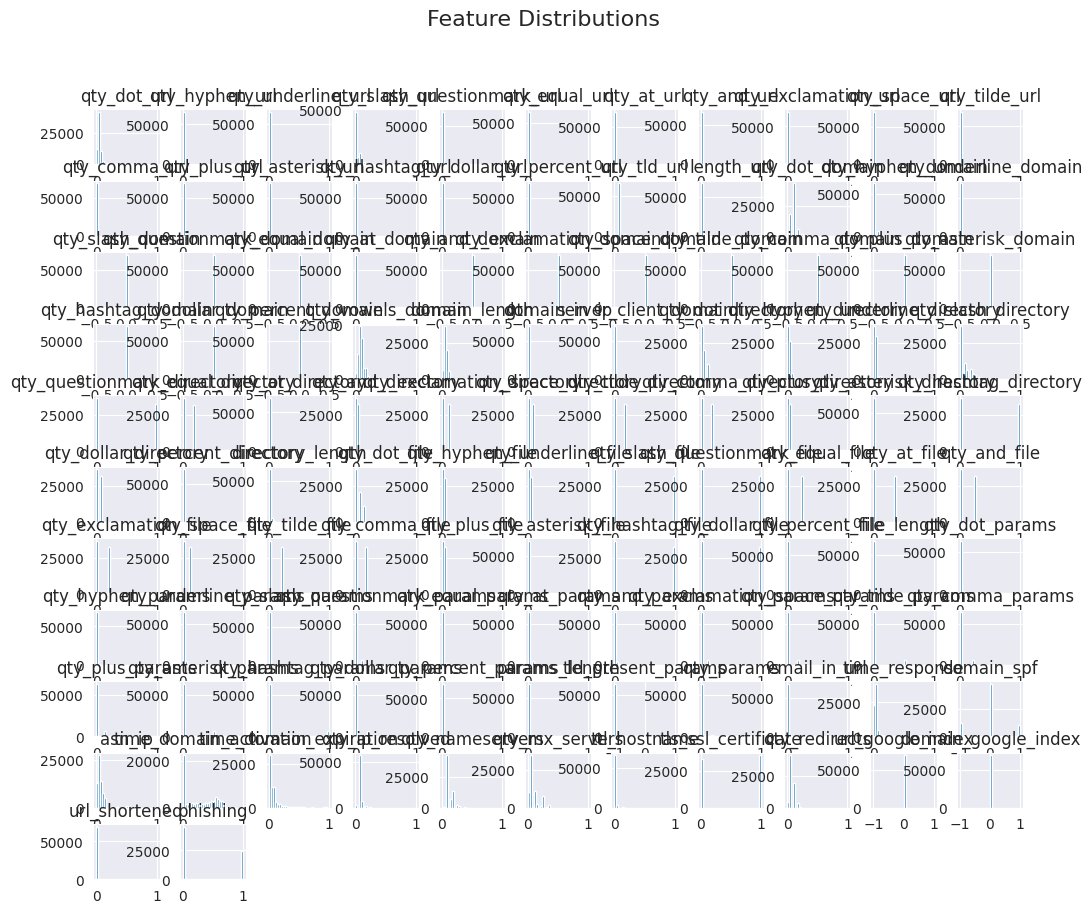

In [ ]:
# Step 4: Exploratory Data Analysis (EDA)
# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Plot distribution of phishing vs. legitimate websites
plt.figure(figsize=(6,4))
sns.countplot(x='phishing', data=data, palette='coolwarm')
plt.title("Distribution of Phishing vs. Legitimate Websites")
plt.xlabel("Class (0 = Legitimate, 1 = Phishing)")
plt.ylabel("Count")
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Visualize feature distributions
data.hist(figsize=(12,10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [ ]:
# Step 5: Split the dataset into training (80%) and testing (20%) sets
X = data.drop(columns=['phishing'])  # Features
y = data['phishing']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dataset successfully split into training and testing sets.")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Dataset successfully split into training and testing sets.
Training set shape: (55525, 111)
Testing set shape: (13882, 111)


# **RNN** (Recurrent Neural Network)

RNNs process data one step at a time ie sequentially, passing information from forward from the previous steps. This helps it detect patterns in data over time which makes them appropriate for sequential tasks.

In [ ]:
# Step 6: Create a deep learning binary classification model (RNN-based)
from tensorflow.keras.layers import SimpleRNN, Flatten

# Reshape input for RNN
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

# Initialize model
model = Sequential([
    SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    SimpleRNN(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
)

# Model Summary
model.summary()

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Track per-epoch training time
epoch_times = []
epoch_start_time = None

def on_epoch_begin(epoch, logs=None):
    global epoch_start_time
    epoch_start_time = time.time()

def on_epoch_end(epoch, logs=None):
    global epoch_start_time
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)
    print(f"Epoch {epoch+1} Training Time: {epoch_time:.2f} seconds")

# Single Callback to Avoid Duplication
time_callback = tf.keras.callbacks.LambdaCallback(
    on_epoch_begin=on_epoch_begin,
    on_epoch_end=on_epoch_end
)

# Train Model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, time_callback],
    verbose=1  # Ensure verbose=1 to prevent duplication
)

print("Model training complete.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 111, 64)             │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,873 (77.63 KB)

 Trainable params: 19,873 (77.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1736/1736 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7765 - auc: 0.8218 - loss: 0.4467 - precision: 0.7191 - recall: 0.5454Epoch 1 Training Time: 92.78 seconds
1736/1736 ━━━━━━━━━━━━━━━━━━━━ 93s 51ms/step - accuracy: 0.7765 - auc: 0.8219 - loss: 0.4466 - precision: 0.7192 - recall: 0.5455 - val_accuracy: 0.8912 - val_auc: 0.9535 - val_loss: 0.2575 - val_precision: 0.7819 - val_recall: 0.9532
Epoch 2/50
1735/1736 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8953 - auc: 0.9541 - loss: 0.2523 - precision: 0.8150 - recall: 0.9065Epoch 2 Training Time: 142.92 seconds
1736/1736 ━━━━━━━━━━━━━━━━━━━━ 143s 51ms/step - accuracy: 0.8953 - auc: 0.9541 - loss: 0.2523 - precision: 0.8150 - recall: 0.9065 - val_accuracy: 0.9002 - val_auc: 0.9660 - val_loss: 0.2356 - val_precision: 0.8855 - val_recall: 0.8194
Epoch 3/50
1735/1736 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9011 - auc: 0.9593 - loss: 0.2385 - precision: 0.8292 - recall: 0.9029Epoch 3 Training Time: 141.57 seconds

In [ ]:
# Step 8: Generate model predictions and evaluate performance
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC Score: {auc:.4f}")
#print(f"Total Training Time: {total_training_time:.2f} seconds")
print(f"Average Time per Epoch: {np.mean(epoch_times):.2f} seconds")
print("Confusion Matrix:")
print(conf_matrix)


434/434 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step

Model Evaluation Metrics:
Accuracy: 0.9163
Precision: 0.8500
Recall: 0.9224
AUC Score: 0.9177
Average Time per Epoch: 127.80 seconds
Confusion Matrix:
[[8261  787]
 [ 375 4459]]


In [ ]:
# Step 9: Compute and display False Acceptance Rate (FAR) and False Rejection Rate (FRR)
false_positives = conf_matrix[0][1]
false_negatives = conf_matrix[1][0]
true_negatives = conf_matrix[0][0]
true_positives = conf_matrix[1][1]

far = false_positives / (false_positives + true_negatives)  # FAR = FP / (FP + TN)
frr = false_negatives / (false_negatives + true_positives)  # FRR = FN / (FN + TP)

# Display FAR and FRR
print("\nFalse Acceptance Rate (FAR):", round(far, 4))
print("False Rejection Rate (FRR):", round(frr, 4))


False Acceptance Rate (FAR): 0.087
False Rejection Rate (FRR): 0.0776


In [ ]:
# Save training history
np.save("model_history_RNN.npy", history.history)
hist_cnn = np.load("model_history_RNN.npy", allow_pickle=True).item()

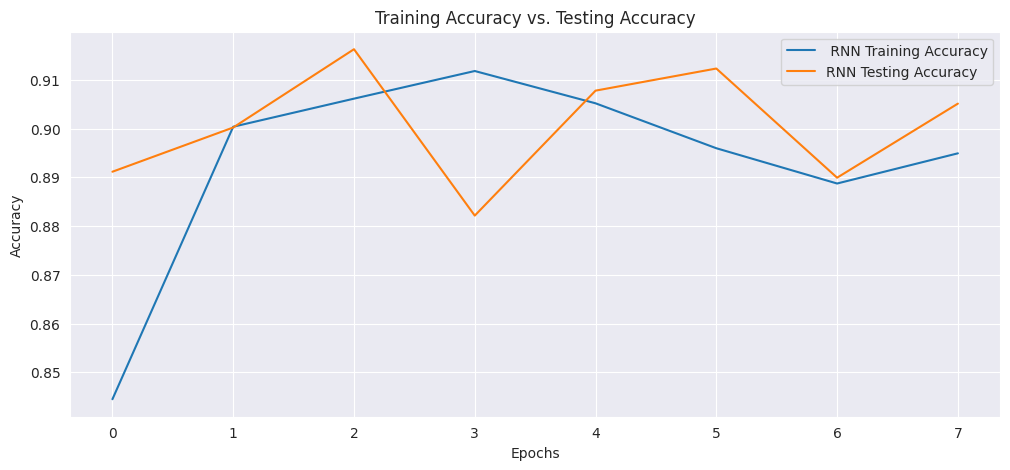

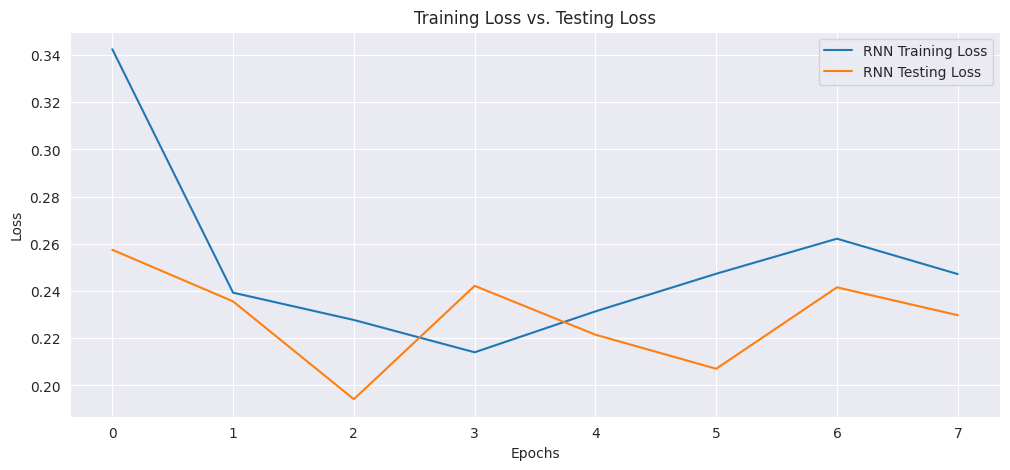

In [ ]:
# Step 10: Plot Training Accuracy vs. Testing Accuracy and Training Loss vs. Testing Loss

# Plot Training Accuracy vs. Testing Accuracy
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label=' RNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='RNN Testing Accuracy')
plt.title("Training Accuracy vs. Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot Training Loss vs. Testing Loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='RNN Training Loss')
plt.plot(history.history['val_loss'], label='RNN Testing Loss')
plt.title("Training Loss vs. Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
#THIS STEP IS OPTIONAL. DO THIS WHEN YOU WANT TO DEPLOY FINAL MODEL AT ENDPOINT.

# Save training history. cnahnge name of model here like CNN, RNN, LSTM, etc. here
#np.save("CNN_model_history.npy", history.history)

# Step 11: Save the trained model for deployment
model.save("phishing_detection_RNN_model.keras")
print("Trained model saved as phishing_detection_RNN_model.keras")

Trained model saved as phishing_detection_RNN_model.keras


# **DBN** (Deep Belief Network)


DBN is a type of deep learning model that is unsupervised, probabilistic neural network used for feature learning and classification. DBNs learn features layer by layer in an unsupervised manner and then use them for classification or prediction. This helps improve accuracy, especially when labeled data is limited.

In [ ]:
from sklearn.neural_network import BernoulliRBM
from tensorflow.keras.optimizers import Adam

# Convert data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Ensure Data is 2D for RBM
if X_train.ndim == 3:  # If input has 3D shape (samples, timesteps, features)
    X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten to 2D (samples, features)
    X_test = X_test.reshape(X_test.shape[0], -1)

# Define RBM layers for unsupervised pretraining
rbm1 = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=10, verbose=1)
rbm2 = BernoulliRBM(n_components=64, learning_rate=0.01, n_iter=10, verbose=1)

# Train RBM layer-wise
X_train_rbm1 = rbm1.fit_transform(X_train)  # First RBM layer
X_train_rbm2 = rbm2.fit_transform(X_train_rbm1)  # Second RBM layer

# Transform test data
X_test_rbm1 = rbm1.transform(X_test)
X_test_rbm2 = rbm2.transform(X_test_rbm1)

#Build DBN model (fine-tuned MLP)
dbn_model = Sequential()

# Fully connected layers initialized with RBM weights
dbn_model.add(Dense(128, activation='relu', input_shape=(X_train_rbm2.shape[1],)))
dbn_model.add(Dropout(0.2))

dbn_model.add(Dense(64, activation='relu'))
dbn_model.add(Dropout(0.2))

# Output layer for binary classification
dbn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
dbn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

# Model summary
dbn_model.summary()

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the fine-tuned DBN model
history_dbn = dbn_model.fit(
    X_train_rbm2, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_rbm2, y_test),
    callbacks=[early_stopping],
    verbose=1
)

print("DBN model training complete.")



[BernoulliRBM] Iteration 1, pseudo-likelihood = -52.56, time = 2.12s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -67.12, time = 3.37s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -77.75, time = 3.07s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -107.79, time = 2.78s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -132.32, time = 2.69s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -223.45, time = 2.91s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -194.91, time = 3.47s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -236.66, time = 2.81s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -292.49, time = 2.71s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -289.87, time = 2.72s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -12.79, time = 2.11s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -10.67, time = 1.81s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -8.98, time = 1.83s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -8.09, time = 1.88s
[BernoulliRBM] Iteration 5, 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,641 (65.00 KB)

 Trainable params: 16,641 (65.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1736/1736 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - AUC: 0.5552 - Precision: 0.9074 - Recall: 0.1025 - accuracy: 0.6850 - loss: 0.6272 - val_AUC: 0.5491 - val_Precision: 0.9896 - val_Recall: 0.0987 - val_accuracy: 0.6858 - val_loss: 0.6129
Epoch 2/50
1736/1736 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.5504 - Precision: 0.9795 - Recall: 0.1029 - accuracy: 0.6852 - loss: 0.6151 - val_AUC: 0.5491 - val_Precision: 0.9896 - val_Recall: 0.0987 - val_accuracy: 0.6858 - val_loss: 0.6118
Epoch 3/50
1736/1736 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - AUC: 0.5559 - Precision: 0.9705 - Recall: 0.1079 - accuracy: 0.6849 - loss: 0.6137 - val_AUC: 0.5491 - val_Precision: 0.9896 - val_Recall: 0.0987 - val_accuracy: 0.6858 - val_loss: 0.6110
Epoch 4/50
1736/1736 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.5607 - Precision: 0.9706 - Recall: 0.1073 - accuracy: 0.6871 - loss: 0.6121 - val_AUC: 0.5491 - val_Precision: 0.9896 - val_Recall: 0.0987 - val_accuracy: 0.6858 - val_loss: 0.6129
Epoch 5/50
1736/1736 ━━

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Predict on test data
y_pred_dbn = (dbn_model.predict(X_test_rbm2) > 0.5).astype(int)

# Compute evaluation metrics
accuracy_dbn = accuracy_score(y_test, y_pred_dbn)
precision_dbn = precision_score(y_test, y_pred_dbn)
recall_dbn = recall_score(y_test, y_pred_dbn)
auc_dbn = roc_auc_score(y_test, y_pred_dbn)
conf_matrix_dbn = confusion_matrix(y_test, y_pred_dbn)

# Print results
print("\nDBN Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_dbn:.4f}")
print(f"Precision: {precision_dbn:.4f}")
print(f"Recall: {recall_dbn:.4f}")
print(f"AUC Score: {auc_dbn:.4f}")
print("Confusion Matrix:")
print(conf_matrix_dbn)

# Save training history
np.save("model_history_DBN.npy", history_dbn.history)

434/434 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

DBN Model Evaluation Metrics:
Accuracy: 0.6858
Precision: 0.9896
Recall: 0.0987
AUC Score: 0.5491
Confusion Matrix:
[[9043    5]
 [4357  477]]


In [ ]:
# Step 9: Compute and display False Acceptance Rate (FAR) and False Rejection Rate (FRR) for LSTM
# Extract values from confusion matrix
false_positives_dbn = conf_matrix_dbn[0][1]
false_negatives_dbn = conf_matrix_dbn[1][0]
true_negatives_dbn = conf_matrix_dbn[0][0]
true_positives_dbn = conf_matrix_dbn[1][1]

# Calculate FAR (False Acceptance Rate) and FRR (False Rejection Rate)
far_dbn = false_positives_dbn / (false_positives_dbn + true_negatives_dbn)  # FAR = FP / (FP + TN)
frr_dbn = false_negatives_dbn / (false_negatives_dbn + true_positives_dbn)  # FRR = FN / (FN + TP)

# Display FAR and FRR for DBN
print("\nDBN False Acceptance Rate (FAR):", round(far_dbn, 4))
print("DBN False Rejection Rate (FRR):", round(frr_dbn, 4))

# Save training history for DBN
np.save("model_history_DBN.npy", history_dbn.history)
hist_dbn = np.load("model_history_DBN.npy", allow_pickle=True).item()



DBN False Acceptance Rate (FAR): 0.0006
DBN False Rejection Rate (FRR): 0.9013


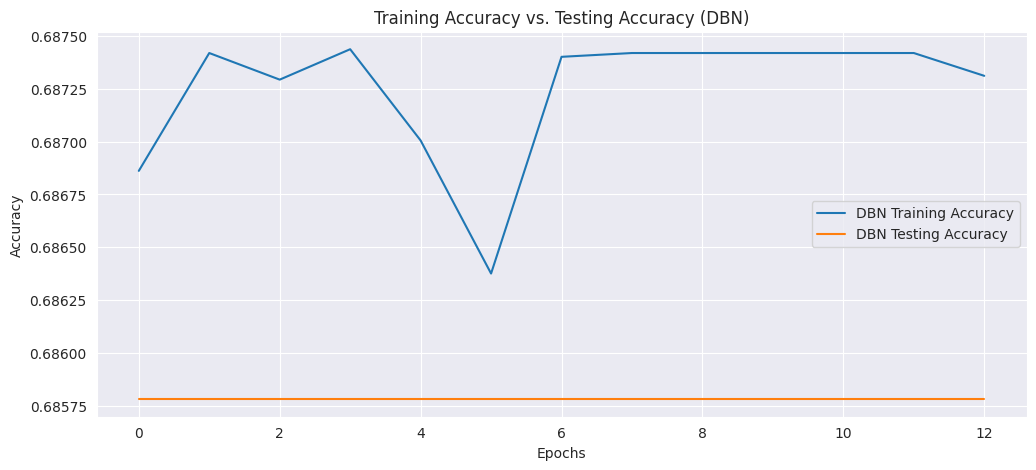

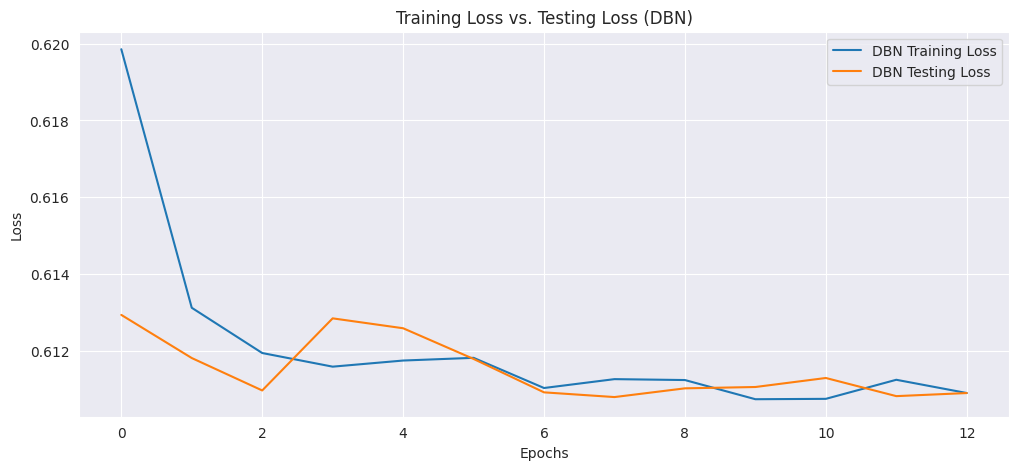

In [ ]:
# Step 10: Plot Training Accuracy vs. Testing Accuracy and Training Loss vs. Testing Loss for LSTM

# Plot Training Accuracy vs. Testing Accuracy for DBN
plt.figure(figsize=(12, 5))
plt.plot(history_dbn.history['accuracy'], label='DBN Training Accuracy')
plt.plot(history_dbn.history['val_accuracy'], label='DBN Testing Accuracy')
plt.title("Training Accuracy vs. Testing Accuracy (DBN)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot Training Loss vs. Testing Loss for DBN
plt.figure(figsize=(12, 5))
plt.plot(history_dbn.history['loss'], label='DBN Training Loss')
plt.plot(history_dbn.history['val_loss'], label='DBN Testing Loss')
plt.title("Training Loss vs. Testing Loss (DBN)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame to store metrics
metrics_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "AUC Score", "FAR", "FRR"],
    "RNN Model": [accuracy, precision, recall, auc, far, frr],
    "DBN Model": [accuracy_dbn, precision_dbn, recall_dbn, auc_dbn, far_dbn, frr_dbn]
}

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Print the table
print(metrics_df)



      Metric  RNN Model  DBN Model
0   Accuracy   0.916294   0.685780
1  Precision   0.849981   0.989627
2     Recall   0.922424   0.098676
3  AUC Score   0.917722   0.549062
4        FAR   0.086981   0.000553
5        FRR   0.077576   0.901324


The RNN model balances precision and recall well, ensuring both low false positives and false negatives.
As per the above results, phishing detection requires catching most phishing sites which makes RNN is the better choice